In [55]:
from ipywidgets import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 8.0)
import numpy as np
import uncertainties as u
from uncertainties import unumpy
import math as math

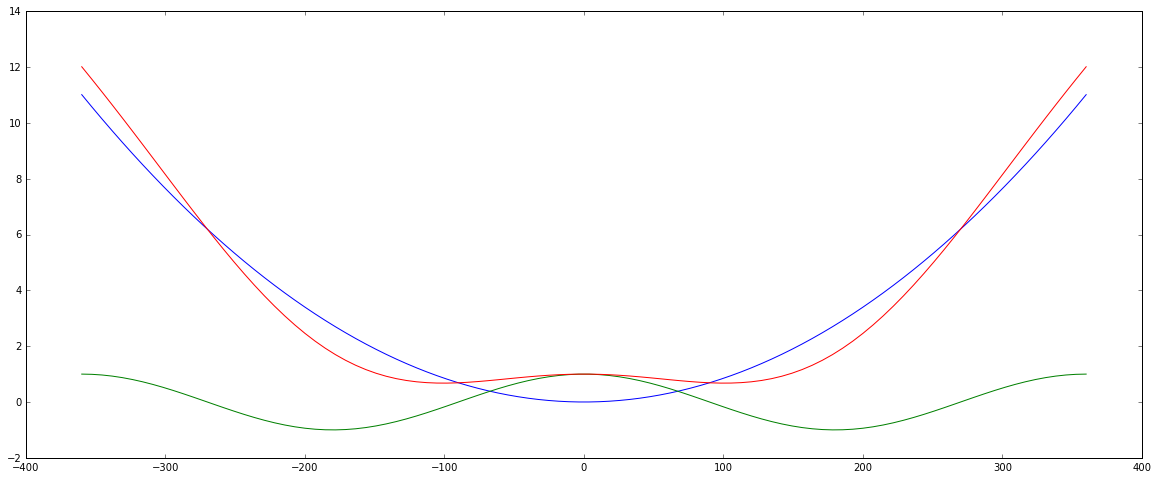

In [84]:
# resolution of simulation
steps = 100

# Magnetic dipole
muStrength = 1
muDirection = np.linspace(-360, 360, steps)

# define the external field
magneticFieldStrength = 1
magneticFieldDirection = 180


kappa = .00017 # torsion constant of the torsion fiber

torsionZero = 0 # torsional zero in degrees
# the potential energy of the 
torsionFiberPotentialEnergy = (1/2)*kappa*(muDirection - torsionZero)**2

# calculate the dot product
magneticDipolePotentialEnergy = -muStrength * magneticFieldStrength * np.cos( np.deg2rad(magneticFieldDirection - muDirection) )

totalPotentialEnergy = torsionFiberPotentialEnergy + magneticDipolePotentialEnergy

plt.plot(muDirection, torsionFiberPotentialEnergy)
plt.plot(muDirection, magneticDipolePotentialEnergy)
plt.plot(muDirection, totalPotentialEnergy)
plt.show()

# we are looking for equlibrium positions that are less than 360deg away from each other. 

In [57]:
print(250-475)

-225


In [ ]:
def recalculate_potential_energy()